In [1]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

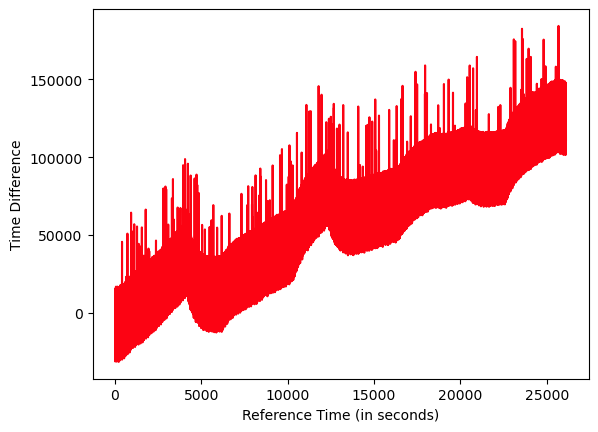

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data_file = open('Data/Exp3_10_66.txt', 'r')
line = data_file.readline().strip('\n').split(", ")
normalize_ESP = int(line[1])
normalize_RPi = float(line[2])
time_diff = []
  
while True:
    try:
        line = data_file.readline().strip('\n').split(", ")
        time_diff_val = int((float(line[2]) - normalize_RPi)*1000000) - (int(line[1]) - normalize_ESP)
        time_diff.append(time_diff_val)
    except IndexError or ValueError:
        break
        
data_file.close()
ref_time = np.arange(1, len(time_diff)+1).reshape(-1, 1)
time_diff = np.array(time_diff).reshape(-1, 1)

plt.plot(ref_time, time_diff, color = '#fc0313')
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.show()

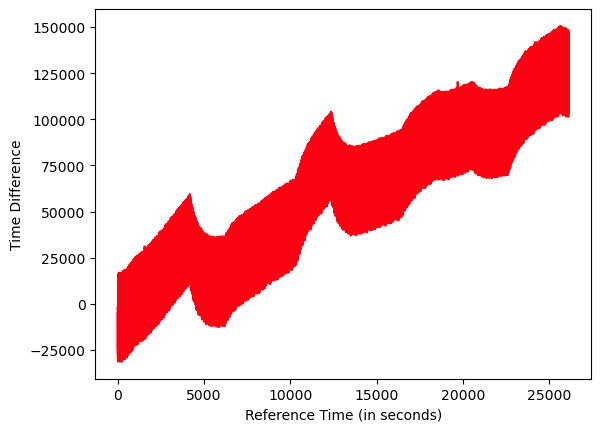

In [3]:
window_size = 100
init_mean = sum(time_diff[:window_size])/window_size
moving_averages = []
for _ in range(window_size-1):
    moving_averages.append(init_mean)
  
i = 0
while(i < len(time_diff) - window_size + 1):
    window = time_diff[i : i + window_size]
    window_average = sum(window) / window_size
    moving_averages.append(window_average)
    i += 1

for i in range(len(time_diff)):
    if(abs(moving_averages[i] - time_diff[i]) > 27000):
        time_diff[i] = moving_averages[i]

plt.plot(ref_time, time_diff, color = '#fc0313')
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.show()

In [4]:
def linear_regression(X, y):
    X_mean = X.mean()
    y_mean = y.mean()
    
    slope = ((X - X_mean) * (y - y_mean)).sum() / ((X - X_mean)**2).sum()
    intercept = y_mean - (slope*X_mean)
    
    return (slope, intercept)

Linear Regression line Equation: y = -1856.441 + 4.7838x 


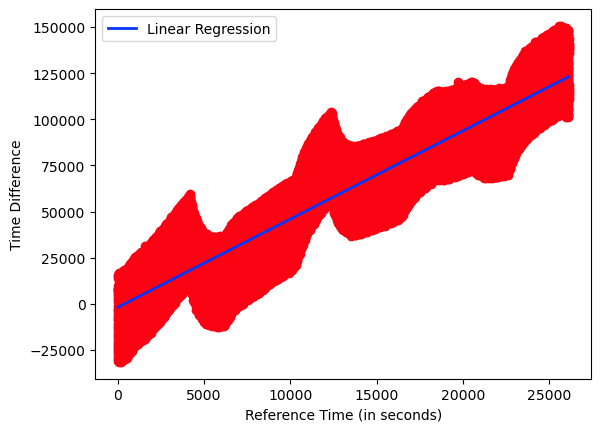

In [5]:
slope, intercept = linear_regression(ref_time, time_diff)
print("Linear Regression line Equation: y = {} + {}x ".format(round(intercept,4), round(slope, 4)))

#%matplotlib qt
plt.scatter(ref_time, time_diff, color = '#fc0313')
plt.plot(ref_time, intercept + slope*ref_time, color = '#0335fc', linewidth=2, label = "Linear Regression")
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.legend()
plt.show()

In [ ]:
#Support Vector Regression

from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
ref_time_scaled = StdS_X.fit_transform(ref_time)
time_diff_scaled = StdS_y.fit_transform(time_diff)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ref_time_scaled, time_diff_scaled, test_size=0.3, random_state=109)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())
y_train_pred = regressor.predict(X_train).reshape(-1,1)
y_test_pred = regressor.predict(X_test).reshape(-1,1)

from sklearn.metrics import mean_squared_error
print("Training Set Error:", mean_squared_error(y_train, y_train_pred))
print("Test Set Error: ", mean_squared_error(y_test, y_test_pred))

X_train_sorted = [x for x, y in sorted(zip(X_train, y_train_pred))]
y_train_pred_sorted = [y for x, y in sorted(zip(X_train, y_train_pred))]
X_test_sorted = [x for x, y in sorted(zip(X_test, y_test_pred))]
y_test_pred_sorted = [y for x, y in sorted(zip(X_test, y_test_pred))]

#%matplotlib qt
plt.scatter(StdS_X.inverse_transform(X_train), StdS_y.inverse_transform(y_train), color = '#fc0313', linewidth=2, label = "Train Set")
plt.plot(StdS_X.inverse_transform(X_train_sorted), StdS_y.inverse_transform(y_train_pred_sorted), color = '#0335fc', linewidth=2, label = "Predicted Train Set")
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.legend()
plt.show()
plt.scatter(StdS_X.inverse_transform(X_test), StdS_y.inverse_transform(y_test), color = '#fc0313', linewidth=2, label = "Test Set")
plt.plot(StdS_X.inverse_transform(X_test_sorted), StdS_y.inverse_transform(y_test_pred_sorted), color = '#fcba03', linewidth=2, label = "Predicted Test Set")
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.legend()
plt.show()

In [ ]:
#Random Forest Regression

from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
ref_time_scaled = StdS_X.fit_transform(ref_time)
time_diff_scaled = StdS_y.fit_transform(time_diff)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ref_time_scaled, time_diff_scaled, test_size=0.3, random_state=109)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.ravel())
y_train_pred = regressor.predict(X_train).reshape(-1,1)
y_test_pred = regressor.predict(X_test).reshape(-1,1)

from sklearn.metrics import mean_squared_error
print("Training Set Error:", mean_squared_error(y_train, y_train_pred))
print("Test Set Error: ", mean_squared_error(y_test, y_test_pred))

X_train_sorted = [x for x, y in sorted(zip(X_train, y_train_pred))]
y_train_pred_sorted = [y for x, y in sorted(zip(X_train, y_train_pred))]
X_test_sorted = [x for x, y in sorted(zip(X_test, y_test_pred))]
y_test_pred_sorted = [y for x, y in sorted(zip(X_test, y_test_pred))]

#%matplotlib qt 
plt.scatter(StdS_X.inverse_transform(X_train), StdS_y.inverse_transform(y_train), color = '#fc0313', linewidth=2, label = "Train Set")
plt.plot(StdS_X.inverse_transform(X_train_sorted), StdS_y.inverse_transform(y_train_pred_sorted), color = '#0335fc', linewidth=2, label = "Predicted Train Set")
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.legend()
plt.show()
plt.scatter(StdS_X.inverse_transform(X_test), StdS_y.inverse_transform(y_test), color = '#fc0313', linewidth=2, label = "Test Set")
plt.plot(StdS_X.inverse_transform(X_test_sorted), StdS_y.inverse_transform(y_test_pred_sorted), color = '#fcba03', linewidth=2, label = "Predicted Test Set")
plt.xlabel("Reference Time (in seconds)")
plt.ylabel("Time Difference")
plt.legend()
plt.show()

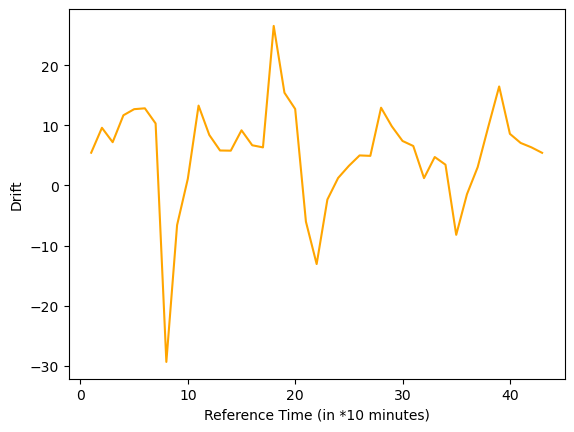

In [6]:
#Taking oscillator drift (slope) for every 10 mins
begin = 0
end = 600
drift = []

while(end < len(time_diff)):
    slope, intercept = linear_regression(ref_time[begin:end], time_diff[begin:end])
    drift.append(slope)
    begin += 600
    end += 600

drift = np.array(drift).reshape(-1, 1)
ref_time_sampled = np.arange(1, len(drift)+1).reshape(-1, 1)
plt.plot(ref_time_sampled, drift, c= 'orange')
plt.xlabel("Reference Time (in *10 minutes)")
plt.ylabel("Drift")
plt.show()

Training Set Error: 1.1093574477738382
Test Set Error:  0.8903975623695615


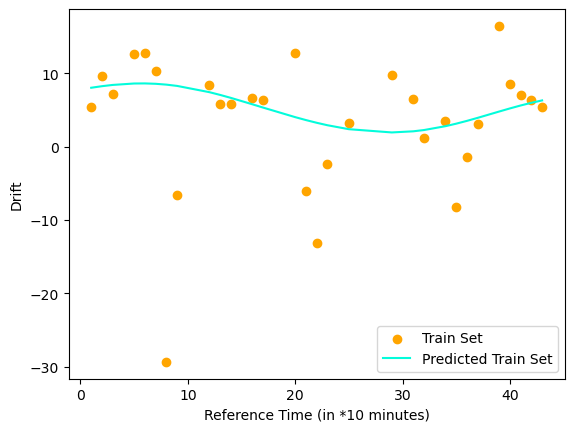

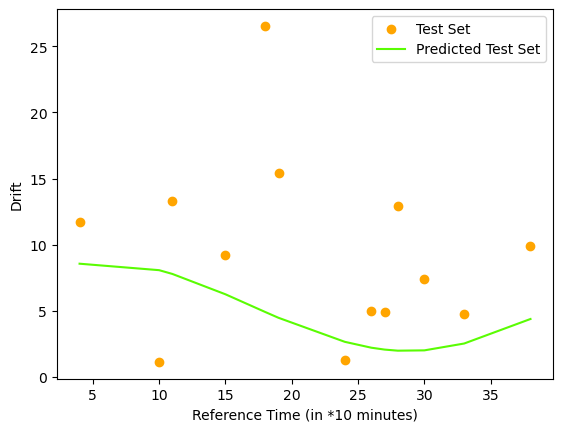

In [7]:
#Support Vector Regression

from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
ref_time_sampled_scaled = StdS_X.fit_transform(ref_time_sampled)
drift_scaled = StdS_y.fit_transform(drift)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ref_time_sampled_scaled, drift_scaled, test_size=0.3, random_state=109)

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train.ravel())
y_train_pred = regressor.predict(X_train).reshape(-1,1)
y_test_pred = regressor.predict(X_test).reshape(-1,1)

from sklearn.metrics import mean_squared_error
print("Training Set Error:", mean_squared_error(y_train, y_train_pred))
print("Test Set Error: ", mean_squared_error(y_test, y_test_pred))

X_train_sorted = [x for x, y in sorted(zip(X_train, y_train_pred))]
y_train_pred_sorted = [y for x, y in sorted(zip(X_train, y_train_pred))]
X_test_sorted = [x for x, y in sorted(zip(X_test, y_test_pred))]
y_test_pred_sorted = [y for x, y in sorted(zip(X_test, y_test_pred))]

#%matplotlib qt 
plt.scatter(StdS_X.inverse_transform(X_train), StdS_y.inverse_transform(y_train), color = 'orange', label = "Train Set")
plt.plot(StdS_X.inverse_transform(X_train_sorted), StdS_y.inverse_transform(y_train_pred_sorted), color = '#03fcdb', label = "Predicted Train Set")
plt.xlabel("Reference Time (in *10 minutes)")
plt.ylabel("Drift")
plt.legend()
plt.show()
plt.scatter(StdS_X.inverse_transform(X_test), StdS_y.inverse_transform(y_test), color = 'orange', label = "Test Set")
plt.plot(StdS_X.inverse_transform(X_test_sorted), StdS_y.inverse_transform(y_test_pred_sorted), color = '#5afc03', label = "Predicted Test Set")
plt.xlabel("Reference Time (in *10 minutes)")
plt.ylabel("Drift")
plt.legend()
plt.show()

Training Set Error: 0.16615165063618054
Test Set Error:  0.7191436168702103


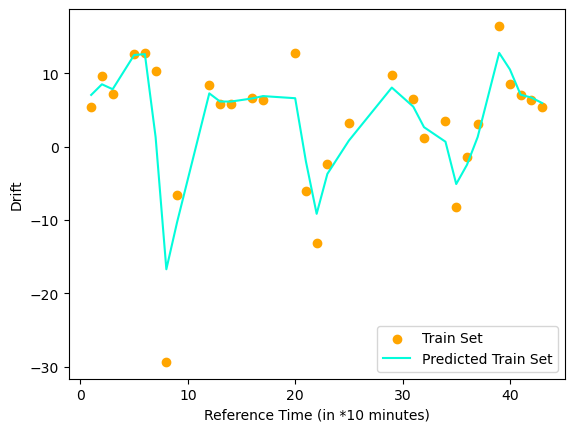

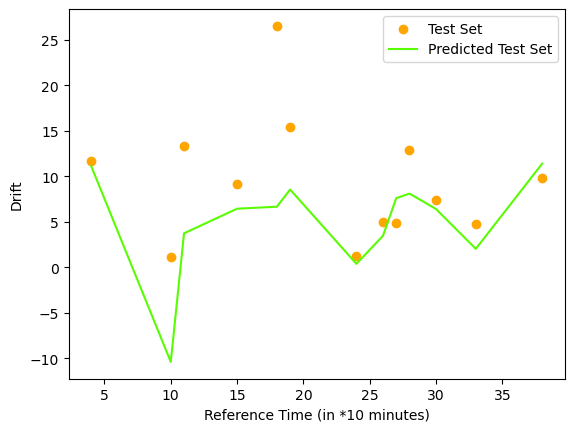

In [8]:
#Random Forest Regression

from sklearn.preprocessing import StandardScaler
StdS_X = StandardScaler()
StdS_y = StandardScaler()
ref_time_sampled_scaled = StdS_X.fit_transform(ref_time_sampled)
drift_scaled = StdS_y.fit_transform(drift)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ref_time_sampled_scaled, drift_scaled, test_size=0.3, random_state=109)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train.ravel())
y_train_pred = regressor.predict(X_train).reshape(-1,1)
y_test_pred = regressor.predict(X_test).reshape(-1,1)

from sklearn.metrics import mean_squared_error
print("Training Set Error:", mean_squared_error(y_train, y_train_pred))
print("Test Set Error: ", mean_squared_error(y_test, y_test_pred))

X_train_sorted = [x for x, y in sorted(zip(X_train, y_train_pred))]
y_train_pred_sorted = [y for x, y in sorted(zip(X_train, y_train_pred))]
X_test_sorted = [x for x, y in sorted(zip(X_test, y_test_pred))]
y_test_pred_sorted = [y for x, y in sorted(zip(X_test, y_test_pred))]

#%matplotlib qt 
plt.scatter(StdS_X.inverse_transform(X_train), StdS_y.inverse_transform(y_train), color = 'orange', label = "Train Set")
plt.plot(StdS_X.inverse_transform(X_train_sorted), StdS_y.inverse_transform(y_train_pred_sorted), color = '#03fcdb', label = "Predicted Train Set")
plt.xlabel("Reference Time (in *10 minutes)")
plt.ylabel("Drift")
plt.legend()
plt.show()
plt.scatter(StdS_X.inverse_transform(X_test), StdS_y.inverse_transform(y_test), color = 'orange', label = "Test Set")
plt.plot(StdS_X.inverse_transform(X_test_sorted), StdS_y.inverse_transform(y_test_pred_sorted), color = '#5afc03', label = "Predicted Test Set")
plt.xlabel("Reference Time (in *10 minutes)")
plt.ylabel("Drift")
plt.legend()
plt.show()